In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/gpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot

import tqdm

import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

from bnlp import SentencepieceTokenizer
import gensim
import fasttext 

C:\Users\moshi\AppData\Local\Temp\ipykernel_15040\2832172220.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/BEMOC/Dataset/BEmoC7k.xlsx')

In [4]:
df.head

<bound method NDFrame.head of                                                    TEXT  classes
0                              নাইমা কি করবেন আমরা জানি  sadness
1                          ভাই সব আপনাদের খুব ভাল লাগছে      joy
2     গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত  বয়কটে ...    anger
3     অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...      joy
4         বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর  disgust
...                                                 ...      ...
6995  হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন   ...  sadness
6996  ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...      joy
6997  বছরের সবচেয়ে সেরা ভিডিও দেখেছি  আমাদের দেশের স...      joy
6998   কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...    anger
6999  \nভাইরেভাই বেস্ট এইটা বেস্ট\nএইরকম পারফেক্ট গল...      joy

[7000 rows x 2 columns]>

In [5]:
df.isnull()

,TEXT,classes
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
6995,False,False
6996,False,False
6997,False,False
6998,False,False


In [6]:
df.dropna(inplace=True)

In [7]:
df.groupby("classes").describe()

TEXT                                                               
         count unique                                                top freq
classes                                                                      
anger     1052   1037  একদিন এই বেইলি রোডে কতো ভিজেছি রিক্সায়  আজ তু...    2
disgust   1356   1334  মানুষ অন্যকে উপদেশ দেয়  টা কারণে \n   সে ওই মা...    2
fear       962    951  বাইরে কেমন যেন একটা খসখস শব্দ হচ্ছে  তার মনে হ...    2
joy       1524   1453  বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত্রী মা...    4
sadness   1327   1303  সবাই তোমাকে কষ্ট দিবে  তোমাকে শুধু এমন একজন কে...    2
surprise   779    759  কিছুক্ষণ আগে লক্ষ্য করলাম  কিছু মানুষ বাঙলাদেশ...    4

In [8]:
df["classes"].value_counts()

joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: classes, dtype: int64

In [9]:
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [10]:
longest_string = max(df["TEXT"], key=len)
print(len(longest_string))

1093


In [11]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()

In [12]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)

In [13]:
df['TEXT'] = df['TEXT'].apply(apply_bangla_stemming)

applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applie

In [14]:
longest_string = max(df["TEXT"], key=len)
print(len(longest_string))

974


In [15]:
train, test = train_test_split(df, test_size=0.2, stratify = df["classes"], random_state = 42)
num_classes = 6
embed_num_dims = 300
max_seq_len = 50

x_train = train['TEXT']
x_test = test['TEXT']

y_train = train['classes']
y_test = test['classes']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['TEXT'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)


encoding = {
    "joy":0,
    "disgust":1,
    "sadness":2,
    "anger":3,
    "fear":4,
    "surprise":5
}

y_train = [encoding[x] for x in train['classes']]
y_test = [encoding[x] for x in test['classes']]



y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 17803
[[    0     0     0 ...    26  8019    52]
 [    0     0     0 ...   285   931   809]
 [    0     0     0 ...   693  3941    41]
 ...
 [    0     0     0 ...  2977 17802 17803]
 [    0     0     0 ...   116  1085     1]
 [    0     0     0 ...   259   130     1]]


In [16]:
# META EMBADDING

In [17]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open('F:/Python_code/embedding/glove.840B.300d.txt',encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix


embedd_matrix_glove = create_embedding_matrix(index_of_words, embed_num_dims)
print(embedd_matrix_glove.shape)

(17804, 300)


# Random Search

In [18]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix_glove])(seq_input)

  cnn = keras.layers.Conv1D(cnn_1_unit,3,kernel_regularizer=regularizers.l2(1e-4),
                            bias_regularizer=regularizers.l2(1e-2),
                            activity_regularizer=regularizers.l2(1e-4))(embedded)
  cnn = keras.layers.Activation(activation='relu')(cnn)
  cnn = keras.layers.BatchNormalization()(cnn)
  cnn = keras.layers.Dropout(cnn_1_dropout,seed=seed_value)(cnn)

  lstm = keras.layers.Bidirectional(keras.layers.LSTM(lstm_unit, recurrent_regularizer=regularizers.l2(1e-4),
                                                      return_sequences=True,kernel_regularizer=regularizers.l2(1e-4),
                                                      bias_regularizer=regularizers.l2(1e-2),
                                                      activity_regularizer=regularizers.l2(1e-4),input_shape =(48,)))(cnn)
  lstm = keras.layers.Activation(activation='relu')(lstm)
  lstm = keras.layers.BatchNormalization()(lstm)
  lstm = keras.layers.Dropout(lstm_dropout,seed=seed_value)(lstm)
  
  
  max_pooling = keras.layers.GlobalMaxPooling1D()(lstm)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=5,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)



tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 30,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 30 Complete [00h 00m 55s]
val_accuracy: 0.5271428823471069

Best val_accuracy So Far: 0.5407142639160156
Total elapsed time: 00h 17m 31s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1708511107\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 23 summary
Hyperparameters:
cnn_1_unit: 80
cnn_1_dropout: 0.1
lstm_unit: 192
lstm_dropout: 0.4
Score: 0.5407142639160156

Trial 15 summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.2
lstm_unit: 160
lstm_dropout: 0.30000000000000004
Score: 0.5364285707473755

Trial 03 summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.1
lstm_unit: 160
lstm_dropout: 0.4
Score: 0.5357142686843872

Trial 06 summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.1
lstm_unit: 160
lstm_dropout: 0.5
Score: 0.5335714221000671

Trial 26 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.2
lstm_unit: 160
lstm_dropout: 0.2
Score: 0.5328571200370789

Trial 12 summary
Hyperparameters:
cn

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [20]:
#get best hypoerparamter
best_hps = tuner.get_best_hyperparameters()[0]
model = build_model(best_hps)

Ya it comes here


In [21]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/30
88/88 [==============================] - 5s 30ms/step - loss: 4.9866 - accuracy: 0.3732 - val_loss: 3.9117 - val_accuracy: 0.2193
Epoch 2/30
88/88 [==============================] - 2s 23ms/step - loss: 2.6000 - accuracy: 0.6914 - val_loss: 2.8162 - val_accuracy: 0.2664
Epoch 3/30
88/88 [==============================] - 2s 23ms/step - loss: 1.2711 - accuracy: 0.9013 - val_loss: 2.0264 - val_accuracy: 0.4271
Epoch 4/30
88/88 [==============================] - 2s 23ms/step - loss: 0.9691 - accuracy: 0.8630 - val_loss: 1.7096 - val_accuracy: 0.4864
Epoch 5/30
88/88 [==============================] - 2s 23ms/step - loss: 0.5117 - accuracy: 0.9468 - val_loss: 1.9505 - val_accuracy: 0.5007
Epoch 6/30
88/88 [==============================] - 2s 23ms/step - loss: 0.6526 - accuracy: 0.9109 - val_loss: 2.2934 - val_accuracy: 0.5114
Epoch 7/30
88/88 [==============================] - 2s 23ms/step - loss: 0.4109 - accuracy: 0.9548 - val_loss: 2.8230 - val_accuracy: 0.4957
Epoch 8/30
88

In [22]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

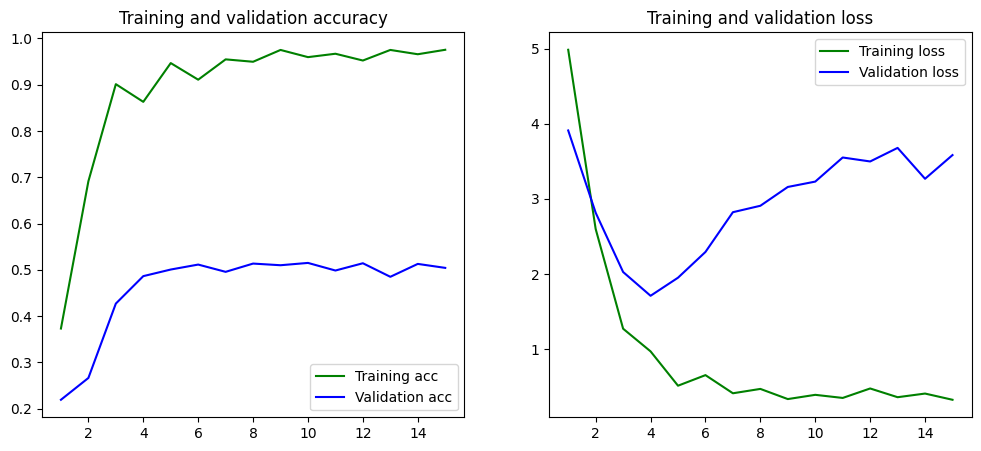

In [23]:
PlotGraph(history)

In [24]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

44/44 [==============================] - 1s 7ms/step


array([2, 5, 3, ..., 0, 5, 4], dtype=int64)

In [25]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([4, 1, 2, ..., 0, 4, 4], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[213,  23,  23,  20,   3,  23],
       [ 32,  97,  31,  92,   5,  14],
       [ 46,  33, 114,  37,  19,  16],
       [ 22,  41,  18, 110,   6,  14],
       [  9,  12,  20,  17, 112,  22],
       [ 30,  13,  16,  12,  10,  75]], dtype=int64)

In [27]:
class_names = list(encoding.keys())

In [28]:
print(class_names)

['joy', 'disgust', 'sadness', 'anger', 'fear', 'surprise']


<Axes: >

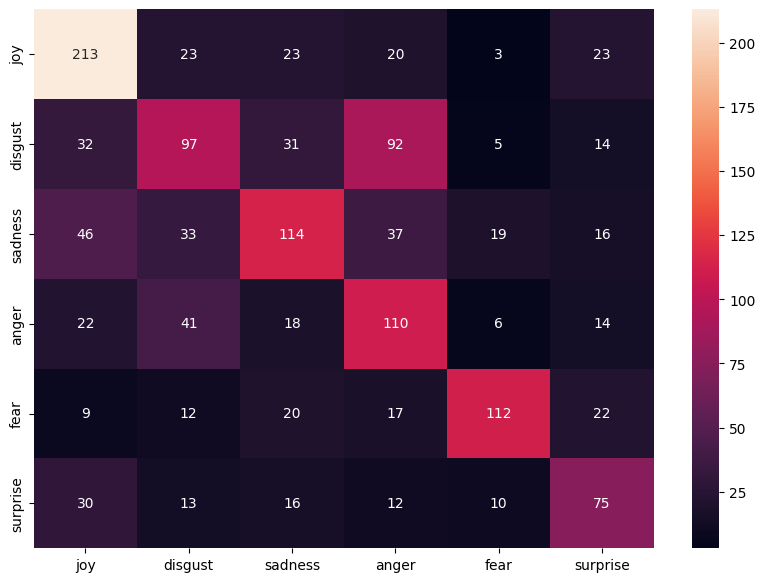

In [29]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [30]:
from sklearn.metrics import classification_report
print(classification_report(predict_lables, predict_class, target_names =class_names))

              precision    recall  f1-score   support

         joy       0.61      0.70      0.65       305
     disgust       0.44      0.36      0.40       271
     sadness       0.51      0.43      0.47       265
       anger       0.38      0.52      0.44       211
        fear       0.72      0.58      0.65       192
    surprise       0.46      0.48      0.47       156

    accuracy                           0.52      1400
   macro avg       0.52      0.51      0.51      1400
weighted avg       0.52      0.52      0.51      1400

